In [1]:
from utils import load_data, load_json, retrieve_docs, precision_recall, vector_space_cos
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def approximate_matrix(A, k):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    H_k =  np.diag(S[:k]) @ V[:k, :]   
    U_k = U[:, :k]
    return U_k, H_k

In [3]:
def cos_distance(U_k, h_j, q):
    q_k = U_k.T @ q
    return q_k.T @ h_j / (np.linalg.norm(q_k) * np.linalg.norm(h_j))


In [4]:
data_path = r"../data/text-mining-medline_stemmed.mat"
data = load_data(data_path)
A = data["A"].A
q = data["q"].A
U_k, H_k = approximate_matrix(A, 100)
m_q, n_q = q.shape
m_h, n_h = H_k.shape
distance_matrix = np.zeros((n_q, n_h))
vector_space_distance_matrix = np.zeros((n_q, n_h))
for i in range(n_q):
    for j in range(n_h):
        cos_dist = cos_distance(U_k, H_k[:, j], q[:, i])
        vector_space_distance = vector_space_cos(A[:,j], q[:, i])
        distance_matrix[i][j] = cos_dist
        vector_space_distance_matrix[i][j] = vector_space_distance


In [6]:
q_9_distances = distance_matrix[8]
q_9_distances_vector_space = vector_space_distance_matrix[8]
# q_9_distances[q_9_distances < .745] = 0.0
# print(np.nonzero(q_9_distances))


In [9]:

json_dict = load_json(r"../data\med\MED.json")

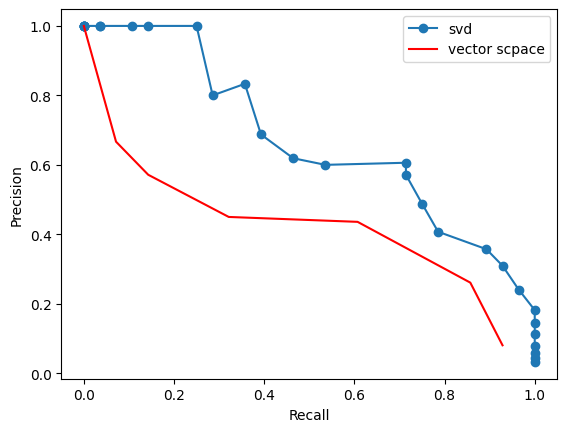

In [10]:
#try to plot precision and recall for query 9
tol = np.linspace(.0, 1.0, 30)
precision = []
recall = []
vs_precision = []
vs_recall = []
for t in tol:
    retrieved_docs = retrieve_docs(q_9_distances, t)
    vs_retrieved_docs = retrieve_docs(q_9_distances_vector_space, t)
    precision_value, recall_value = precision_recall(json_dict, "9", retrieved_docs)
    vs_precision_value, vs_recall_value = precision_recall(json_dict, "9", vs_retrieved_docs)
    precision.append(precision_value)
    recall.append(recall_value)
    vs_precision.append(vs_precision_value)
    vs_recall.append(vs_recall_value)

plt.plot(recall, precision, "o-", label="svd")
plt.plot(vs_recall, vs_precision, "r", label="vector scpace")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

            